In [1]:
import numpy 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
np.random.seed(10)

In [2]:
dataset = pd.read_csv('D:\\metro\\metroday.csv', header=0, index_col=0)
values = dataset.values

In [3]:
dataset=values[:,0].reshape(-1,1)#注意將一維陣列，轉化為2維陣列
dataset = dataset.astype('float32')
dataset.shape

(2069, 1)

In [4]:
def create_dataset(dataset, look_back=7):#後一個數據和前look_back個數據有關係
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a) #.apeend方法追加元素
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
numpy.random.seed(10)

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))#歸一化0-1
dataset = scaler.fit_transform(dataset)
# split into train and test sets  #訓練集和測試集分割
train, test = dataset[:1600,:], dataset[1600:,:]#訓練集和測試集
# use this function to prepare the train and test datasets for modeling
look_back = 7
trainX,trainY = create_dataset(train, look_back)#訓練輸入輸出
testX,testY=create_dataset(test, look_back)#測試輸入輸出

In [123]:
 #reshape input to be [samples, time steps, features]#注意轉化資料維數
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(1592, 1, 7) (1592,) (460, 1, 7) (460,)


In [124]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN

In [125]:
model = Sequential()
model.add(SimpleRNN(units = 128, return_sequences = True, input_shape = (1, look_back)))
model.add(SimpleRNN(units = 64, return_sequences = True))
model.add(SimpleRNN(units = 32, return_sequences = True))
model.add(SimpleRNN(units = 16))
model.add(Dense(units=1,activation='relu' ))
model.add(Dense(units=1,activation='sigmoid' ))

In [126]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_37 (SimpleRNN)    (None, 1, 128)            17408     
_________________________________________________________________
simple_rnn_38 (SimpleRNN)    (None, 1, 64)             12352     
_________________________________________________________________
simple_rnn_39 (SimpleRNN)    (None, 1, 32)             3104      
_________________________________________________________________
simple_rnn_40 (SimpleRNN)    (None, 16)                784       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 2         
Total params: 33,667
Trainable params: 33,667
Non-trainable params: 0
_________________________________________________

In [127]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [128]:
history = model.fit(trainX, trainY, epochs = 4000, batch_size = 50,verbose=1)

Epoch 1/4000
1592/1592 [==============================] - 1s 409us/step - loss: 0.0090
Epoch 2/4000
1592/1592 [==============================] - 0s 65us/step - loss: 0.0070
Epoch 3/4000
1592/1592 [==============================] - 0s 60us/step - loss: 0.0065
Epoch 4/4000
1592/1592 [==============================] - 0s 70us/step - loss: 0.0064
Epoch 5/4000
1592/1592 [==============================] - 0s 68us/step - loss: 0.0060
Epoch 6/4000
1592/1592 [==============================] - 0s 52us/step - loss: 0.0058
Epoch 7/4000
1592/1592 [==============================] - 0s 53us/step - loss: 0.0061
Epoch 8/4000
1592/1592 [==============================] - 0s 53us/step - loss: 0.0062
Epoch 9/4000
1592/1592 [==============================] - 0s 59us/step - loss: 0.0056
Epoch 10/4000
1592/1592 [==============================] - 0s 60us/step - loss: 0.0057
Epoch 11/4000
1592/1592 [==============================] - 0s 53us/step - loss: 0.0056
Epoch 12/4000
1592/1592 [==========================

1592/1592 [==============================] - 0s 61us/step - loss: 0.0032
Epoch 189/4000
1592/1592 [==============================] - 0s 61us/step - loss: 0.0033
Epoch 190/4000
1592/1592 [==============================] - 0s 52us/step - loss: 0.0031
Epoch 191/4000
1592/1592 [==============================] - 0s 51us/step - loss: 0.0032
Epoch 192/4000
1592/1592 [==============================] - 0s 58us/step - loss: 0.0031
Epoch 193/4000
1592/1592 [==============================] - 0s 61us/step - loss: 0.0030
Epoch 194/4000
1592/1592 [==============================] - 0s 51us/step - loss: 0.0032
Epoch 195/4000
1592/1592 [==============================] - 0s 50us/step - loss: 0.0032
Epoch 196/4000
1592/1592 [==============================] - 0s 50us/step - loss: 0.0031
Epoch 197/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0033
Epoch 198/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0031
Epoch 199/4000
1592/1592 [=====================

Epoch 281/4000
1592/1592 [==============================] - 0s 51us/step - loss: 0.0027
Epoch 282/4000
1592/1592 [==============================] - 0s 51us/step - loss: 0.0027
Epoch 283/4000
1592/1592 [==============================] - 0s 50us/step - loss: 0.0026
Epoch 284/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0027
Epoch 285/4000
1592/1592 [==============================] - 0s 52us/step - loss: 0.0027
Epoch 286/4000
1592/1592 [==============================] - 0s 58us/step - loss: 0.0027
Epoch 287/4000
1592/1592 [==============================] - 0s 61us/step - loss: 0.0027
Epoch 288/4000
1592/1592 [==============================] - 0s 57us/step - loss: 0.0026
Epoch 289/4000
1592/1592 [==============================] - 0s 51us/step - loss: 0.0027
Epoch 290/4000
1592/1592 [==============================] - 0s 52us/step - loss: 0.0026
Epoch 291/4000
1592/1592 [==============================] - 0s 48us/step - loss: 0.0026
Epoch 292/4000
1592/1592 [======

1592/1592 [==============================] - 0s 57us/step - loss: 0.0024
Epoch 375/4000
1592/1592 [==============================] - 0s 50us/step - loss: 0.0024
Epoch 376/4000
1592/1592 [==============================] - 0s 50us/step - loss: 0.0023
Epoch 377/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0023
Epoch 378/4000
1592/1592 [==============================] - 0s 48us/step - loss: 0.0024
Epoch 379/4000
1592/1592 [==============================] - 0s 50us/step - loss: 0.0026
Epoch 380/4000
1592/1592 [==============================] - 0s 50us/step - loss: 0.0024
Epoch 381/4000
1592/1592 [==============================] - 0s 51us/step - loss: 0.0024
Epoch 382/4000
1592/1592 [==============================] - 0s 48us/step - loss: 0.0024
Epoch 383/4000
1592/1592 [==============================] - 0s 48us/step - loss: 0.0023
Epoch 384/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0023
Epoch 385/4000
1592/1592 [=====================

1592/1592 [==============================] - 0s 49us/step - loss: 0.0020
Epoch 561/4000
1592/1592 [==============================] - 0s 47us/step - loss: 0.0020
Epoch 562/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0020
Epoch 563/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0021
Epoch 564/4000
1592/1592 [==============================] - 0s 58us/step - loss: 0.0020
Epoch 565/4000
1592/1592 [==============================] - 0s 63us/step - loss: 0.0020
Epoch 566/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0020
Epoch 567/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0020
Epoch 568/4000
1592/1592 [==============================] - 0s 51us/step - loss: 0.0019
Epoch 569/4000
1592/1592 [==============================] - 0s 48us/step - loss: 0.0020
Epoch 570/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0020
Epoch 571/4000
1592/1592 [=====================

1592/1592 [==============================] - 0s 53us/step - loss: 0.0018
Epoch 747/4000
1592/1592 [==============================] - 0s 51us/step - loss: 0.0017
Epoch 748/4000
1592/1592 [==============================] - 0s 48us/step - loss: 0.0017
Epoch 749/4000
1592/1592 [==============================] - 0s 48us/step - loss: 0.0018
Epoch 750/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0017
Epoch 751/4000
1592/1592 [==============================] - 0s 50us/step - loss: 0.0018
Epoch 752/4000
1592/1592 [==============================] - 0s 48us/step - loss: 0.0018
Epoch 753/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0019
Epoch 754/4000
1592/1592 [==============================] - 0s 51us/step - loss: 0.0018
Epoch 755/4000
1592/1592 [==============================] - 0s 48us/step - loss: 0.0017
Epoch 756/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0019
Epoch 757/4000
1592/1592 [=====================

1592/1592 [==============================] - 0s 61us/step - loss: 0.0017
Epoch 933/4000
1592/1592 [==============================] - 0s 54us/step - loss: 0.0016
Epoch 934/4000
1592/1592 [==============================] - 0s 50us/step - loss: 0.0016
Epoch 935/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0016
Epoch 936/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0017
Epoch 937/4000
1592/1592 [==============================] - 0s 57us/step - loss: 0.0016
Epoch 938/4000
1592/1592 [==============================] - 0s 55us/step - loss: 0.0017
Epoch 939/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0016
Epoch 940/4000
1592/1592 [==============================] - 0s 47us/step - loss: 0.0015
Epoch 941/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0015
Epoch 942/4000
1592/1592 [==============================] - 0s 50us/step - loss: 0.0015
Epoch 943/4000
1592/1592 [=====================

Epoch 1025/4000
1592/1592 [==============================] - 0s 48us/step - loss: 0.0014
Epoch 1026/4000
1592/1592 [==============================] - 0s 48us/step - loss: 0.0015
Epoch 1027/4000
1592/1592 [==============================] - 0s 50us/step - loss: 0.0014
Epoch 1028/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0013
Epoch 1029/4000
1592/1592 [==============================] - 0s 48us/step - loss: 0.0014
Epoch 1030/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0014
Epoch 1031/4000
1592/1592 [==============================] - 0s 47us/step - loss: 0.0015
Epoch 1032/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0014
Epoch 1033/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0014
Epoch 1034/4000
1592/1592 [==============================] - 0s 51us/step - loss: 0.0013
Epoch 1035/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0014
Epoch 1036/4000
1592/

1592/1592 [==============================] - 0s 51us/step - loss: 0.0014
Epoch 1118/4000
1592/1592 [==============================] - 0s 52us/step - loss: 0.0015
Epoch 1119/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0013
Epoch 1120/4000
1592/1592 [==============================] - 0s 50us/step - loss: 0.0014
Epoch 1121/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0020
Epoch 1122/4000
1592/1592 [==============================] - 0s 47us/step - loss: 0.0017
Epoch 1123/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0014
Epoch 1124/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0014
Epoch 1125/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0014
Epoch 1126/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0013
Epoch 1127/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0012
Epoch 1128/4000
1592/1592 [==========

1592/1592 [==============================] - 0s 50us/step - loss: 0.0011
Epoch 1302/4000
1592/1592 [==============================] - 0s 50us/step - loss: 0.0011
Epoch 1303/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0012
Epoch 1304/4000
1592/1592 [==============================] - 0s 56us/step - loss: 0.0011
Epoch 1305/4000
1592/1592 [==============================] - 0s 48us/step - loss: 0.0012
Epoch 1306/4000
1592/1592 [==============================] - 0s 48us/step - loss: 0.0011
Epoch 1307/4000
1592/1592 [==============================] - 0s 50us/step - loss: 0.0011
Epoch 1308/4000
1592/1592 [==============================] - 0s 48us/step - loss: 0.0011
Epoch 1309/4000
1592/1592 [==============================] - 0s 48us/step - loss: 0.0012
Epoch 1310/4000
1592/1592 [==============================] - 0s 47us/step - loss: 0.0011
Epoch 1311/4000
1592/1592 [==============================] - 0s 49us/step - loss: 0.0011
Epoch 1312/4000
1592/1592 [==========

1592/1592 [==============================] - 0s 53us/step - loss: 9.8095e-04
Epoch 1484/4000
1592/1592 [==============================] - 0s 48us/step - loss: 0.0010
Epoch 1485/4000
1592/1592 [==============================] - 0s 51us/step - loss: 9.2760e-04
Epoch 1486/4000
1592/1592 [==============================] - 0s 52us/step - loss: 0.0010
Epoch 1487/4000
1592/1592 [==============================] - 0s 51us/step - loss: 0.0010
Epoch 1488/4000
1592/1592 [==============================] - 0s 50us/step - loss: 9.4593e-04
Epoch 1489/4000
1592/1592 [==============================] - 0s 49us/step - loss: 9.2271e-04
Epoch 1490/4000
1592/1592 [==============================] - 0s 52us/step - loss: 0.0010
Epoch 1491/4000
1592/1592 [==============================] - 0s 51us/step - loss: 0.0011
Epoch 1492/4000
1592/1592 [==============================] - 0s 52us/step - loss: 8.9886e-04
Epoch 1493/4000
1592/1592 [==============================] - 0s 49us/step - loss: 9.0708e-04
Epoch 1494/40

1592/1592 [==============================] - 0s 53us/step - loss: 8.5234e-04
Epoch 1573/4000
1592/1592 [==============================] - 0s 53us/step - loss: 0.0011
Epoch 1574/4000
1592/1592 [==============================] - 0s 52us/step - loss: 8.0106e-04
Epoch 1575/4000
1592/1592 [==============================] - 0s 50us/step - loss: 7.8239e-04
Epoch 1576/4000
1592/1592 [==============================] - 0s 51us/step - loss: 9.1948e-04
Epoch 1577/4000
1592/1592 [==============================] - 0s 50us/step - loss: 8.1098e-04
Epoch 1578/4000
1592/1592 [==============================] - 0s 51us/step - loss: 8.5084e-04
Epoch 1579/4000
1592/1592 [==============================] - 0s 51us/step - loss: 8.3394e-04
Epoch 1580/4000
1592/1592 [==============================] - 0s 50us/step - loss: 7.8757e-04
Epoch 1581/4000
1592/1592 [==============================] - 0s 51us/step - loss: 7.6480e-04
Epoch 1582/4000
1592/1592 [==============================] - 0s 51us/step - loss: 8.4703e-

Epoch 1661/4000
1592/1592 [==============================] - 0s 51us/step - loss: 0.0012
Epoch 1662/4000
1592/1592 [==============================] - 0s 51us/step - loss: 9.5841e-04
Epoch 1663/4000
1592/1592 [==============================] - 0s 51us/step - loss: 8.6135e-04
Epoch 1664/4000
1592/1592 [==============================] - 0s 50us/step - loss: 0.0011
Epoch 1665/4000
1592/1592 [==============================] - 0s 50us/step - loss: 9.5028e-04
Epoch 1666/4000
1592/1592 [==============================] - 0s 51us/step - loss: 8.2005e-04
Epoch 1667/4000
1592/1592 [==============================] - 0s 51us/step - loss: 7.9915e-04
Epoch 1668/4000
1592/1592 [==============================] - 0s 50us/step - loss: 8.0279e-04
Epoch 1669/4000
1592/1592 [==============================] - 0s 49us/step - loss: 9.2309e-04
Epoch 1670/4000
1592/1592 [==============================] - 0s 50us/step - loss: 8.2789e-04
Epoch 1671/4000
1592/1592 [==============================] - 0s 50us/step - lo

1592/1592 [==============================] - 0s 51us/step - loss: 7.4082e-04
Epoch 1838/4000
1592/1592 [==============================] - 0s 52us/step - loss: 8.5064e-04
Epoch 1839/4000
1592/1592 [==============================] - 0s 51us/step - loss: 6.6799e-04
Epoch 1840/4000
1592/1592 [==============================] - 0s 50us/step - loss: 7.8421e-04
Epoch 1841/4000
1592/1592 [==============================] - 0s 50us/step - loss: 0.0011
Epoch 1842/4000
1592/1592 [==============================] - 0s 51us/step - loss: 8.2511e-04
Epoch 1843/4000
1592/1592 [==============================] - 0s 50us/step - loss: 7.4101e-04
Epoch 1844/4000
1592/1592 [==============================] - 0s 55us/step - loss: 6.2501e-04
Epoch 1845/4000
1592/1592 [==============================] - 0s 66us/step - loss: 6.3548e-04
Epoch 1846/4000
1592/1592 [==============================] - 0s 59us/step - loss: 6.4479e-04
Epoch 1847/4000
1592/1592 [==============================] - 0s 58us/step - loss: 0.0010
E

1592/1592 [==============================] - 0s 51us/step - loss: 6.7255e-04
Epoch 1927/4000
1592/1592 [==============================] - 0s 52us/step - loss: 6.3030e-04
Epoch 1928/4000
1592/1592 [==============================] - 0s 51us/step - loss: 6.5416e-04
Epoch 1929/4000
1592/1592 [==============================] - 0s 50us/step - loss: 7.7273e-04
Epoch 1930/4000
1592/1592 [==============================] - 0s 50us/step - loss: 6.7446e-04
Epoch 1931/4000
1592/1592 [==============================] - 0s 50us/step - loss: 5.8305e-04
Epoch 1932/4000
1592/1592 [==============================] - 0s 50us/step - loss: 6.9559e-04
Epoch 1933/4000
1592/1592 [==============================] - 0s 51us/step - loss: 0.0011
Epoch 1934/4000
1592/1592 [==============================] - 0s 51us/step - loss: 0.0011
Epoch 1935/4000
1592/1592 [==============================] - 0s 50us/step - loss: 0.0012
Epoch 1936/4000
1592/1592 [==============================] - 0s 51us/step - loss: 8.5257e-04
Epoch

Epoch 2015/4000
1592/1592 [==============================] - 0s 53us/step - loss: 6.0604e-04
Epoch 2016/4000
1592/1592 [==============================] - 0s 52us/step - loss: 6.6472e-04
Epoch 2017/4000
1592/1592 [==============================] - 0s 51us/step - loss: 6.3528e-04
Epoch 2018/4000
1592/1592 [==============================] - 0s 59us/step - loss: 5.8111e-04
Epoch 2019/4000
1592/1592 [==============================] - 0s 52us/step - loss: 8.0335e-04
Epoch 2020/4000
1592/1592 [==============================] - 0s 51us/step - loss: 6.7588e-04
Epoch 2021/4000
1592/1592 [==============================] - 0s 53us/step - loss: 0.0011
Epoch 2022/4000
1592/1592 [==============================] - 0s 51us/step - loss: 8.5956e-04
Epoch 2023/4000
1592/1592 [==============================] - 0s 51us/step - loss: 6.3364e-04
Epoch 2024/4000
1592/1592 [==============================] - 0s 50us/step - loss: 8.3255e-04
Epoch 2025/4000
1592/1592 [==============================] - 0s 50us/step 

1592/1592 [==============================] - 0s 61us/step - loss: 7.7582e-04
Epoch 2192/4000
1592/1592 [==============================] - 0s 60us/step - loss: 7.1612e-04
Epoch 2193/4000
1592/1592 [==============================] - 0s 58us/step - loss: 7.6227e-04
Epoch 2194/4000
1592/1592 [==============================] - 0s 57us/step - loss: 5.9414e-04
Epoch 2195/4000
1592/1592 [==============================] - 0s 58us/step - loss: 0.0011
Epoch 2196/4000
1592/1592 [==============================] - 0s 55us/step - loss: 0.0011
Epoch 2197/4000
1592/1592 [==============================] - 0s 58us/step - loss: 7.9688e-04
Epoch 2198/4000
1592/1592 [==============================] - 0s 58us/step - loss: 0.0011
Epoch 2199/4000
1592/1592 [==============================] - 0s 56us/step - loss: 7.8335e-04
Epoch 2200/4000
1592/1592 [==============================] - 0s 56us/step - loss: 7.2671e-04
Epoch 2201/4000
1592/1592 [==============================] - 0s 58us/step - loss: 6.6376e-04
Epoch

Epoch 2368/4000
1592/1592 [==============================] - 0s 53us/step - loss: 8.9663e-04
Epoch 2369/4000
1592/1592 [==============================] - 0s 50us/step - loss: 9.4872e-04
Epoch 2370/4000
1592/1592 [==============================] - 0s 51us/step - loss: 5.9307e-04
Epoch 2371/4000
1592/1592 [==============================] - 0s 51us/step - loss: 0.0013
Epoch 2372/4000
1592/1592 [==============================] - 0s 52us/step - loss: 8.0849e-04
Epoch 2373/4000
1592/1592 [==============================] - 0s 52us/step - loss: 6.8802e-04
Epoch 2374/4000
1592/1592 [==============================] - 0s 51us/step - loss: 5.9577e-04
Epoch 2375/4000
1592/1592 [==============================] - 0s 53us/step - loss: 5.6621e-04
Epoch 2376/4000
1592/1592 [==============================] - 0s 51us/step - loss: 5.3063e-04
Epoch 2377/4000
1592/1592 [==============================] - 0s 50us/step - loss: 0.0011
Epoch 2378/4000
1592/1592 [==============================] - 0s 51us/step - lo

1592/1592 [==============================] - 0s 54us/step - loss: 4.9942e-04
Epoch 2546/4000
1592/1592 [==============================] - 0s 53us/step - loss: 0.0014
Epoch 2547/4000
1592/1592 [==============================] - 0s 51us/step - loss: 7.8037e-04
Epoch 2548/4000
1592/1592 [==============================] - 0s 51us/step - loss: 5.5200e-04
Epoch 2549/4000
1592/1592 [==============================] - 0s 53us/step - loss: 6.4038e-04
Epoch 2550/4000
1592/1592 [==============================] - 0s 53us/step - loss: 8.0762e-04
Epoch 2551/4000
1592/1592 [==============================] - 0s 51us/step - loss: 8.0226e-04
Epoch 2552/4000
1592/1592 [==============================] - 0s 52us/step - loss: 6.2270e-04
Epoch 2553/4000
1592/1592 [==============================] - 0s 52us/step - loss: 0.0012
Epoch 2554/4000
1592/1592 [==============================] - 0s 51us/step - loss: 7.2844e-04
Epoch 2555/4000
1592/1592 [==============================] - 0s 52us/step - loss: 5.0058e-04
E

Epoch 2634/4000
1592/1592 [==============================] - 0s 54us/step - loss: 6.2632e-04
Epoch 2635/4000
1592/1592 [==============================] - 0s 52us/step - loss: 5.1049e-04
Epoch 2636/4000
1592/1592 [==============================] - 0s 53us/step - loss: 4.5453e-04
Epoch 2637/4000
1592/1592 [==============================] - 0s 52us/step - loss: 4.8353e-04
Epoch 2638/4000
1592/1592 [==============================] - 0s 52us/step - loss: 5.0308e-04
Epoch 2639/4000
1592/1592 [==============================] - 0s 52us/step - loss: 5.8789e-04
Epoch 2640/4000
1592/1592 [==============================] - 0s 57us/step - loss: 5.5739e-04
Epoch 2641/4000
1592/1592 [==============================] - 0s 57us/step - loss: 7.9412e-04
Epoch 2642/4000
1592/1592 [==============================] - 0s 55us/step - loss: 9.1478e-04
Epoch 2643/4000
1592/1592 [==============================] - 0s 54us/step - loss: 5.5014e-04
Epoch 2644/4000
1592/1592 [==============================] - 0s 53us/s

1592/1592 [==============================] - 0s 53us/step - loss: 5.7426e-04
Epoch 2811/4000
1592/1592 [==============================] - 0s 52us/step - loss: 5.3760e-04
Epoch 2812/4000
1592/1592 [==============================] - 0s 51us/step - loss: 6.6858e-04
Epoch 2813/4000
1592/1592 [==============================] - 0s 53us/step - loss: 7.9920e-04
Epoch 2814/4000
1592/1592 [==============================] - 0s 52us/step - loss: 5.5983e-04
Epoch 2815/4000
1592/1592 [==============================] - 0s 53us/step - loss: 9.3000e-04
Epoch 2816/4000
1592/1592 [==============================] - 0s 52us/step - loss: 5.0818e-04
Epoch 2817/4000
1592/1592 [==============================] - 0s 52us/step - loss: 4.1897e-04
Epoch 2818/4000
1592/1592 [==============================] - 0s 53us/step - loss: 5.6633e-04
Epoch 2819/4000
1592/1592 [==============================] - 0s 54us/step - loss: 0.0011
Epoch 2820/4000
1592/1592 [==============================] - 0s 51us/step - loss: 8.4463e-

1592/1592 [==============================] - 0s 55us/step - loss: 9.2101e-04
Epoch 2900/4000
1592/1592 [==============================] - 0s 54us/step - loss: 5.9715e-04
Epoch 2901/4000
1592/1592 [==============================] - 0s 57us/step - loss: 9.0801e-04
Epoch 2902/4000
1592/1592 [==============================] - 0s 65us/step - loss: 6.0786e-04
Epoch 2903/4000
1592/1592 [==============================] - 0s 56us/step - loss: 5.4985e-04
Epoch 2904/4000
1592/1592 [==============================] - 0s 52us/step - loss: 0.0011
Epoch 2905/4000
1592/1592 [==============================] - 0s 53us/step - loss: 0.0012
Epoch 2906/4000
1592/1592 [==============================] - 0s 51us/step - loss: 9.4436e-04
Epoch 2907/4000
1592/1592 [==============================] - 0s 53us/step - loss: 9.5895e-04
Epoch 2908/4000
1592/1592 [==============================] - 0s 51us/step - loss: 0.0018
Epoch 2909/4000
1592/1592 [==============================] - 0s 64us/step - loss: 9.5954e-04
Epoch

1592/1592 [==============================] - 0s 61us/step - loss: 9.0619e-04
Epoch 3076/4000
1592/1592 [==============================] - 0s 61us/step - loss: 4.6232e-04
Epoch 3077/4000
1592/1592 [==============================] - 0s 55us/step - loss: 5.9745e-04
Epoch 3078/4000
1592/1592 [==============================] - 0s 53us/step - loss: 0.0017
Epoch 3079/4000
1592/1592 [==============================] - 0s 53us/step - loss: 0.0017
Epoch 3080/4000
1592/1592 [==============================] - 0s 60us/step - loss: 0.0011
Epoch 3081/4000
1592/1592 [==============================] - 0s 65us/step - loss: 5.3516e-04
Epoch 3082/4000
1592/1592 [==============================] - 0s 60us/step - loss: 4.3917e-04
Epoch 3083/4000
1592/1592 [==============================] - 0s 68us/step - loss: 7.5003e-04
Epoch 3084/4000
1592/1592 [==============================] - 0s 53us/step - loss: 5.9200e-04
Epoch 3085/4000
1592/1592 [==============================] - 0s 53us/step - loss: 0.0016
Epoch 308

1592/1592 [==============================] - 0s 57us/step - loss: 6.1823e-04
Epoch 3253/4000
1592/1592 [==============================] - 0s 55us/step - loss: 0.0011
Epoch 3254/4000
1592/1592 [==============================] - 0s 55us/step - loss: 8.6152e-04
Epoch 3255/4000
1592/1592 [==============================] - 0s 60us/step - loss: 0.0011
Epoch 3256/4000
1592/1592 [==============================] - 0s 64us/step - loss: 0.0012
Epoch 3257/4000
1592/1592 [==============================] - 0s 55us/step - loss: 6.7323e-04
Epoch 3258/4000
1592/1592 [==============================] - 0s 53us/step - loss: 5.5792e-04
Epoch 3259/4000
1592/1592 [==============================] - 0s 54us/step - loss: 4.7737e-04
Epoch 3260/4000
1592/1592 [==============================] - 0s 53us/step - loss: 4.4372e-04
Epoch 3261/4000
1592/1592 [==============================] - 0s 53us/step - loss: 4.6294e-04
Epoch 3262/4000
1592/1592 [==============================] - 0s 53us/step - loss: 4.4731e-04
Epoch

1592/1592 [==============================] - 0s 54us/step - loss: 4.1618e-04
Epoch 3430/4000
1592/1592 [==============================] - 0s 53us/step - loss: 0.0015
Epoch 3431/4000
1592/1592 [==============================] - 0s 54us/step - loss: 5.4004e-04
Epoch 3432/4000
1592/1592 [==============================] - 0s 52us/step - loss: 4.8703e-04
Epoch 3433/4000
1592/1592 [==============================] - 0s 52us/step - loss: 4.6530e-04
Epoch 3434/4000
1592/1592 [==============================] - 0s 53us/step - loss: 0.0012
Epoch 3435/4000
1592/1592 [==============================] - 0s 52us/step - loss: 0.0010
Epoch 3436/4000
1592/1592 [==============================] - 0s 53us/step - loss: 5.7696e-04
Epoch 3437/4000
1592/1592 [==============================] - 0s 52us/step - loss: 0.0014
Epoch 3438/4000
1592/1592 [==============================] - 0s 53us/step - loss: 8.8702e-04
Epoch 3439/4000
1592/1592 [==============================] - 0s 53us/step - loss: 9.7245e-04
Epoch 344

Epoch 3518/4000
1592/1592 [==============================] - 0s 54us/step - loss: 0.0010
Epoch 3519/4000
1592/1592 [==============================] - 0s 53us/step - loss: 0.0010
Epoch 3520/4000
1592/1592 [==============================] - 0s 54us/step - loss: 5.7982e-04
Epoch 3521/4000
1592/1592 [==============================] - 0s 56us/step - loss: 0.0011
Epoch 3522/4000
1592/1592 [==============================] - 0s 58us/step - loss: 8.4817e-04
Epoch 3523/4000
1592/1592 [==============================] - 0s 53us/step - loss: 4.0670e-04
Epoch 3524/4000
1592/1592 [==============================] - 0s 52us/step - loss: 3.8108e-04
Epoch 3525/4000
1592/1592 [==============================] - 0s 52us/step - loss: 0.0010
Epoch 3526/4000
1592/1592 [==============================] - 0s 53us/step - loss: 4.6781e-04
Epoch 3527/4000
1592/1592 [==============================] - 0s 53us/step - loss: 3.7719e-04
Epoch 3528/4000
1592/1592 [==============================] - 0s 53us/step - loss: 3.58

1592/1592 [==============================] - 0s 56us/step - loss: 7.4829e-04
Epoch 3696/4000
1592/1592 [==============================] - 0s 54us/step - loss: 5.1144e-04
Epoch 3697/4000
1592/1592 [==============================] - 0s 53us/step - loss: 6.7688e-04
Epoch 3698/4000
1592/1592 [==============================] - 0s 53us/step - loss: 6.0996e-04
Epoch 3699/4000
1592/1592 [==============================] - 0s 54us/step - loss: 6.2747e-04
Epoch 3700/4000
1592/1592 [==============================] - 0s 53us/step - loss: 9.5320e-04
Epoch 3701/4000
1592/1592 [==============================] - 0s 54us/step - loss: 5.1071e-04
Epoch 3702/4000
1592/1592 [==============================] - 0s 55us/step - loss: 3.6773e-04
Epoch 3703/4000
1592/1592 [==============================] - 0s 54us/step - loss: 3.8754e-04
Epoch 3704/4000
1592/1592 [==============================] - 0s 53us/step - loss: 8.1459e-04
Epoch 3705/4000
1592/1592 [==============================] - 0s 54us/step - loss: 0.00

1592/1592 [==============================] - 0s 58us/step - loss: 7.3461e-04
Epoch 3872/4000
1592/1592 [==============================] - 0s 57us/step - loss: 7.6728e-04
Epoch 3873/4000
1592/1592 [==============================] - 0s 54us/step - loss: 5.9962e-04
Epoch 3874/4000
1592/1592 [==============================] - 0s 60us/step - loss: 7.2382e-04
Epoch 3875/4000
1592/1592 [==============================] - 0s 54us/step - loss: 5.2244e-04
Epoch 3876/4000
1592/1592 [==============================] - 0s 54us/step - loss: 6.2730e-04
Epoch 3877/4000
1592/1592 [==============================] - 0s 54us/step - loss: 9.0712e-04
Epoch 3878/4000
1592/1592 [==============================] - 0s 55us/step - loss: 6.0301e-04
Epoch 3879/4000
1592/1592 [==============================] - 0s 56us/step - loss: 5.5082e-04
Epoch 3880/4000
1592/1592 [==============================] - 0s 55us/step - loss: 6.1408e-04
Epoch 3881/4000
1592/1592 [==============================] - 0s 54us/step - loss: 5.82

1592/1592 [==============================] - 0s 56us/step - loss: 0.0013
Epoch 3961/4000
1592/1592 [==============================] - 0s 53us/step - loss: 7.6443e-04
Epoch 3962/4000
1592/1592 [==============================] - 0s 58us/step - loss: 5.8970e-04
Epoch 3963/4000
1592/1592 [==============================] - 0s 58us/step - loss: 6.2807e-04
Epoch 3964/4000
1592/1592 [==============================] - 0s 53us/step - loss: 8.6497e-04
Epoch 3965/4000
1592/1592 [==============================] - 0s 55us/step - loss: 8.8241e-04
Epoch 3966/4000
1592/1592 [==============================] - 0s 54us/step - loss: 4.4111e-04
Epoch 3967/4000
1592/1592 [==============================] - 0s 61us/step - loss: 4.5959e-04
Epoch 3968/4000
1592/1592 [==============================] - 0s 60us/step - loss: 0.0012
Epoch 3969/4000
1592/1592 [==============================] - 0s 59us/step - loss: 7.1125e-04
Epoch 3970/4000
1592/1592 [==============================] - 0s 71us/step - loss: 9.5972e-04
E

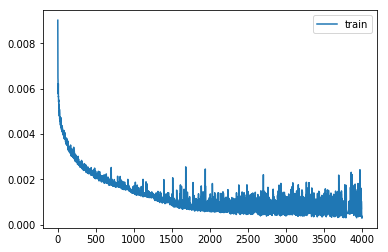

In [129]:
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from numpy import concatenate
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [131]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [132]:
import math
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 49.74 RMSE
Test Score: 215.27 RMSE


In [133]:
inv_y=testY[0]
inv_yhat=testPredict[:,0]

error = []
for i in range(len(inv_y)):
    error.append(inv_y[i] - inv_yhat[i])
 
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#target-prediction之差平方 
    absError.append(abs(val))#误差绝对值

print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE
 
from math import sqrt
print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#均方根误差RMSE
print("MAE = ", sum(absError) / len(absError))#平均绝对误差MAE
def mape(inv_y, inv_yhat):
    n = len(inv_y)
    mape = sum(np.abs((inv_y - inv_yhat)/inv_y))/n*100
    return mape
print("MAPE = " ,mape(inv_y, inv_yhat))#平均绝对误差MAPE

MSE =  46341.0165418275
RMSE =  215.2696368321076
MAE =  119.06164871500332
MAPE =  6.2211972933926925


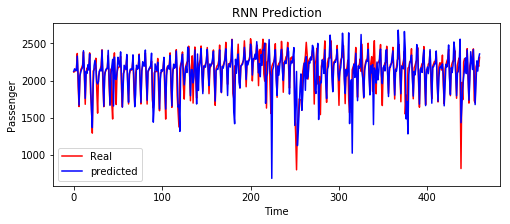

In [144]:
plt.figure(figsize=(8,3))
plt.plot(testY[0], color = 'red', label = 'Real ')   
plt.plot(testPredict[:,0], color = 'blue', label = 'predicted') 
plt.title('RNN Prediction')
plt.xlabel('Time')
plt.ylabel('Passenger')
plt.legend()
plt.show()

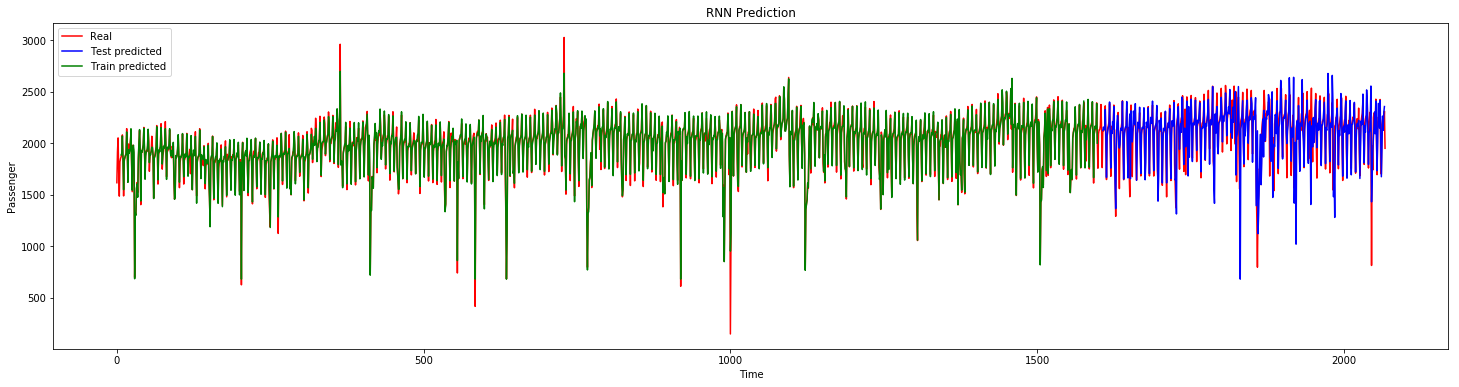

In [138]:
predicted=np.concatenate((trainPredict[:,0],testPredict[:,0]))
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.figure(figsize=(25,6))
plt.plot(scaler.inverse_transform(dataset), color = 'red', label = 'Real ') 
plt.plot(testPredictPlot, color = 'blue', label = 'Test predicted')  
plt.plot(trainPredictPlot, color = 'green', label = 'Train predicted') 
plt.title('RNN Prediction')
plt.xlabel('Time')
plt.ylabel('Passenger')
plt.legend()
plt.show()

In [136]:
from keras.models import load_model
 
model.save('RNN2_model.h5')